  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/af/77/cf6ceb000f8a064c7b373fb3471d85bcc39917d175af82fead4a2857c669/torch-2.3.1-cp312-cp312-win_amd64.whl.metadata
  Using cached torch-2.3.1-cp312-cp312-win_amd64.whl.metadata (26 kB)
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/ae/f0/48285f0262fe47103a4a45972ed2f9b93e4c80b8fd609fa98da78b2a5706/filelock-3.15.4-py3-none-any.whl.metadata
  Using cached filelock-3.15.4-py3-none-any.whl.metadata (2.9 kB)
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/62/74/7e6c65ee89ff43942bffffdbb238634f16967bf327aee3c76efcf6e49587

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python312\\Library'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\transformers-cli.exe' -> 'C:\\Python312\\Scripts\\transformers-cli.exe.deleteme'


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Keyword arguments {'use_auth_token': False, 'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Translated text: Mother and baby girl walking in the park


  0%|          | 0/35 [00:00<?, ?it/s]

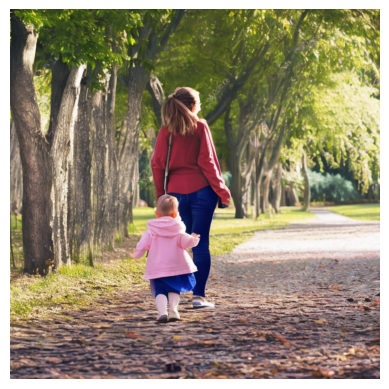

In [1]:
!python -m pip install torch --ignore-installed
!pip install googletrans==3.1.0a0
!pip install --upgrade diffusers transformers -q

from googletrans import Translator
import torch 
from diffusers import StableDiffusionPipeline 
from PIL import Image 
import matplotlib.pyplot as plt 

def get_translation(text, dest_lang):
    translator = Translator() 
    translated_text = translator.translate(text, dest=dest_lang)
    return translated_text.text

class CFG:
    device = "cuda" if torch.cuda.is_available() else "cpu" 
    seed = 42  
    torch.manual_seed(seed)
    generator = torch.Generator().manual_seed(seed)
    image_gen_steps = 35 
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (900, 900) 
    image_gen_guidance_scale = 9  

image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id,
    torch_dtype=torch.float32, 
    revision="main", 
    use_auth_token=False,  
    guidance_scale=CFG.image_gen_guidance_scale
)
image_gen_model = image_gen_model.to(CFG.device) 

def generate_image(prompt, model):
    image = model(
        prompt,
        num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator 
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image 

translation = get_translation("பூங்காவில் நடந்து செல்லும் தாயும் பெண் குழந்தையும்", "en")
print("Translated text:", translation)

generated_image = generate_image(translation, image_gen_model)

plt.imshow(generated_image)  
plt.axis('off') 
plt.show() 